# Data Mining Homework 2

In [1]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.cross_validation import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             roc_curve, confusion_matrix)

%matplotlib inline

In [2]:
TRAIN_TEST_RATIO = 0.7
RANDSEED = int(datetime.now().timestamp())

In [3]:
df = pd.read_excel('./default of credit card clients.xls', header=1)

## 第一題
Split the data randomly to training data and test data ( 70% / 30% )

In [4]:
df_train, df_test = train_test_split(df,
                                     train_size=TRAIN_TEST_RATIO,
                                     random_state=RANDSEED)

sr_train_id = df_train.pop("ID")
sr_train_y = df_train.pop("default payment next month")

sr_test_id = df_test.pop("ID")
sr_test_y = df_test.pop("default payment next month")

In [5]:
df_train.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
24386,180000,1,1,1,38,1,-2,-1,-1,-2,...,470,0,0,800,0,517,0,0,800,0
1420,200000,1,1,2,31,0,0,0,0,0,...,7957,4667,76187,74900,1900,3008,3500,73000,2700,3800
7753,310000,1,2,1,44,0,0,0,0,0,...,7739,8843,12204,14520,2500,2000,2000,3500,2500,1500
26903,140000,1,2,2,39,1,-1,0,-1,0,...,8808,27319,19278,11505,18539,1000,27329,386,1000,16215
3008,20000,1,2,2,25,0,0,0,0,0,...,17160,16760,16760,0,1406,1400,0,0,0,0


In [6]:
df_test.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
17205,170000,2,2,2,28,0,0,0,2,0,...,48989,47900,51088,54256,2100,4000,0,4000,4000,4000
11717,120000,1,2,2,28,-1,-1,-1,-1,-1,...,2411,1925,2943,6249,3905,2411,1925,2943,6249,1780
26354,100000,2,2,2,30,0,0,2,-1,0,...,177,1170,390,0,2177,0,1170,0,0,19760
28001,150000,2,1,2,29,0,0,0,0,0,...,136196,105989,98836,94504,5200,7982,4500,4048,3800,3818
26044,180000,2,2,2,33,-2,-2,-2,-2,-2,...,22630,7777,3089,8429,3411,22657,7777,3089,8429,6706


## 第二題
What is the accuracy of (1) Logistic Regression (2) k-Nearest Neighbors
(3) Naive Bayes (4) Random Forest (5) SVM model in test data

In [7]:
clfs = [
    (LogisticRegression(), "Logistic Regression"),
    (KNeighborsClassifier(), "k-Nearest Neighbors"),
    (GaussianNB(), "Naive Bayes"),
    (RandomForestClassifier(), "Random Forest"),
    (SVC(), "SVM")
]
LR = 0
KNN = 1
NB = 2
RF = 3
SVM = 4

In [9]:
df_acy = pd.DataFrame(columns=["Method", "Accuracy"])

predicted_result_to = []

for clf, name in clfs:
    clf.fit(df_train, sr_train_y)
    predicted = clf.predict(df_test)
    df_acy = df_acy.append([
            {
                "Method": name,
                "Accuracy": accuracy_score(predicted, sr_test_y)
            }],ignore_index=True)
    predicted_result_to.append(predicted)
df_acy

,Method,Accuracy
0,Logistic Regression,0.781222
1,k-Nearest Neighbors,0.756667
2,Naive Bayes,0.372111
3,Random Forest,0.812444
4,SVM,0.782333


## 第三題
Draw the ROC curve in Logistic Regression

In [16]:
logreg = clfs[LR][0]
score = logreg.decision_function(df_test)
fpr, tpr, thresholds = roc_curve(sr_test_y, score)

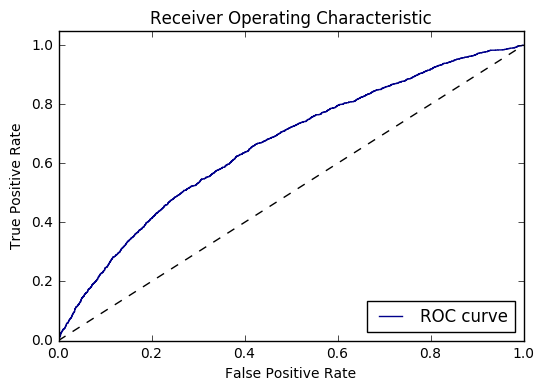

In [17]:
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=1, label="ROC curve")
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 第四題
Calculate the precision and recall in k-Nearest Neighbors

In [18]:
print ("Precision Score : {0:.5f}".format(
        precision_score(
            sr_test_y,
            predicted_result_to[KNN]
        )))
print ("Recall    Score : {0:.5f}".format(
        recall_score(
            sr_test_y,
            predicted_result_to[KNN]
        )))

Precision Score : 0.38627
Recall    Score : 0.19157


## 第五題
Draw the Confusion Matrix of Naive Bayes

In [20]:
pd.DataFrame(
    confusion_matrix(
        sr_test_y,
        predicted_result_to[NB]
    ))

,0,1
0,1590,5442
1,209,1759


## 第六題
What is the performance with different parameters in SVM